# Aritra Raut

In [2]:
import numpy as np
import matplotlib.pyplot as plt

In [38]:
# suppose we have received the following data from some sensor
data_x = np.linspace(1.0, 10.0, 100)[:, np.newaxis]
data_x1=data_x
data_y = np.sin(data_x) + 0.1 * np.power(data_x, 2) + 0.5 * np.random.randn(100, 1)

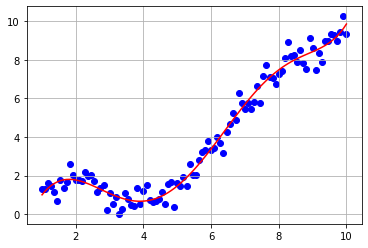

In [39]:
# fit a polynomial of order 6
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression

scale=StandardScaler()
x=scale.fit_transform(data_x)
poly=PolynomialFeatures(degree=6)
x_poly =poly.fit_transform(x)
poly.fit(x_poly,data_y)
l = LinearRegression()
l.fit(x_poly,data_y)
y_pred = l.predict(x_poly)

plt.grid()
plt.scatter(data_x,data_y,color='b')
plt.plot(data_x,y_pred,color='r')


In [44]:
model_order = 6
data_x = np.power(data_x, range(model_order)) # 1 x x^2 x^3 x^4 x^5
data_x/= np.max(data_x, axis=0)

In [45]:
# Implement gradient computation and theta update 
def gradient_descent(X, y, theta, alpha):
    m,n=X.shape
    for j in range(n):
        for k1 in range(1500):
            sum2=0.0
            for i in range(m):
                sum1=0.0
                for k in range(n):
                    sum1=sum1+(X[i,k]*theta[k])
                #print(y)
                temp_sum=(sum1-y[i])
                sum2=sum2+(temp_sum*X[i,j])
            theta[j]=theta[j]-(alpha*(2/m)*sum2)
    return theta       

In [46]:
# Call stochastic gradient descent in the main loop  
LR =0.1
sample_size =10
epochs = 10
theta = np.zeros(data_x.shape[1])
costs = []
for i in range(epochs): 
    idx = np.random.choice(len(data_x), sample_size, replace=False)
    x_sample = data_x[idx]
    y_sample = data_y[idx]
    theta=gradient_descent(x_sample,y_sample,theta,LR)

In [47]:
theta

array([ 1.01753332,  1.0165518 , 12.71038127,  2.03673159, -2.59210073,
       -1.72292622])

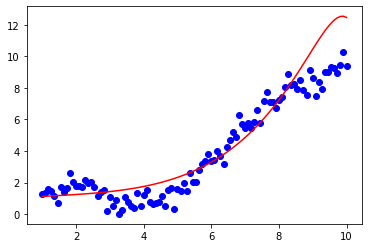

In [48]:
# predict y_hat using test_x and theta
y_hat=data_x@theta
# plot x vs y in blue
plt.scatter(data_x1,data_y,c="blue")
# plot x vs y_hat in red
plt.plot(data_x1,y_hat,c="red")